### Exploração e Visualização de Dados 
* Case: https://www.kaggle.com/c/titanic



#### Importando Biblioteca de Funções Turing Lab e Turing IA

In [1]:
%run -i '/home/hadoop/.Turing/TuringAllFunctions.py'

------------- Turing Lab Data Science --------------------
------ Funções carregadas em memória com sucesso ---------
--------- Data da última atualização: --------------------
--------------- 13/05/2019 -------------------------------
----------------------------------------------------------
--- Consulte o manual de Biblioteca de Funções Turing: ---


----------------------------------------------------------


#### Gerando credenciais de acesso para lake

In [2]:
id_empresa = '1022'
S3fs,S3session,S3client,S3resource = TuringUsersCredentialsControl(id_empresa)

#### Lendo arquivo armazenado como csv no lake

In [3]:
nm_bucket = 'turing-bkt-treinamentos'
path_file = 'Treinamento/Dados/titanic_kaggle.csv'
df_00 = TuringReadS3File(S3client,nm_bucket,path_file,sep=',')
df_00.shape

(891, 12)

In [4]:
df_00.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Análise de Missings

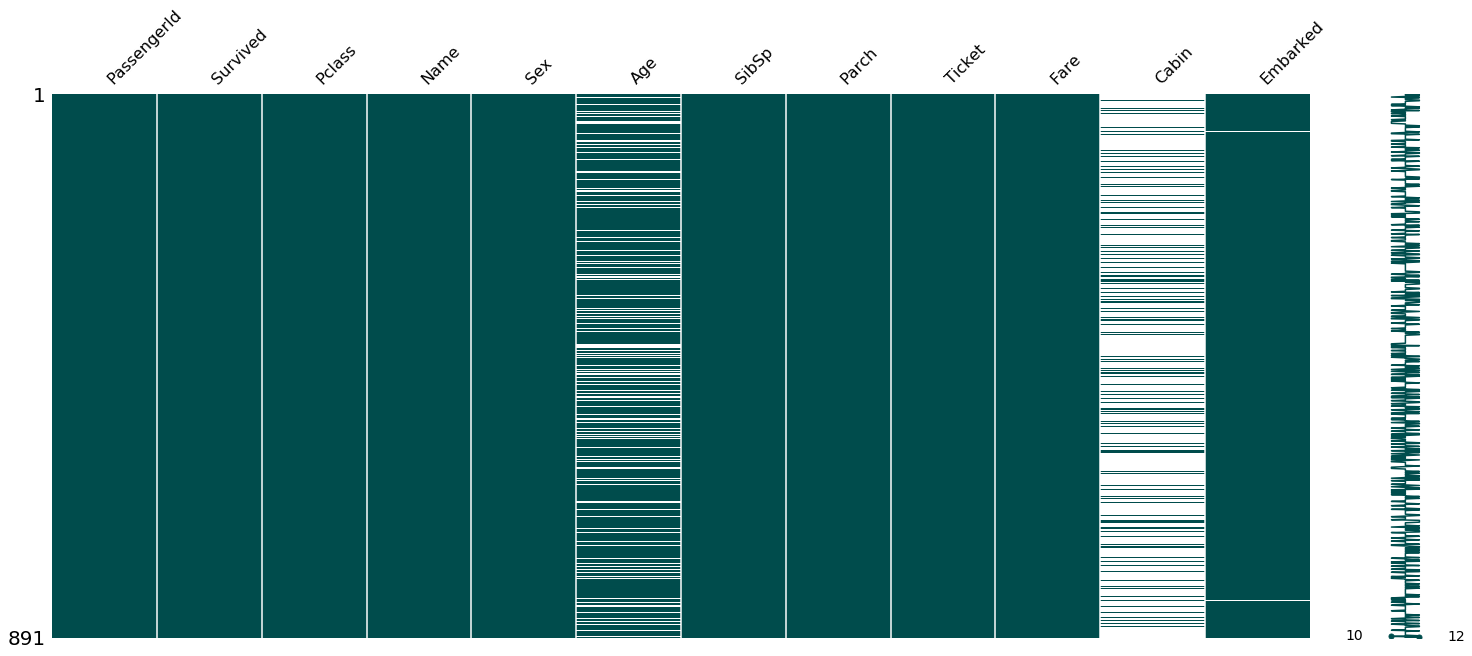

In [5]:
TuringMissingPlot(df_00)

#### Correlação de Pearson

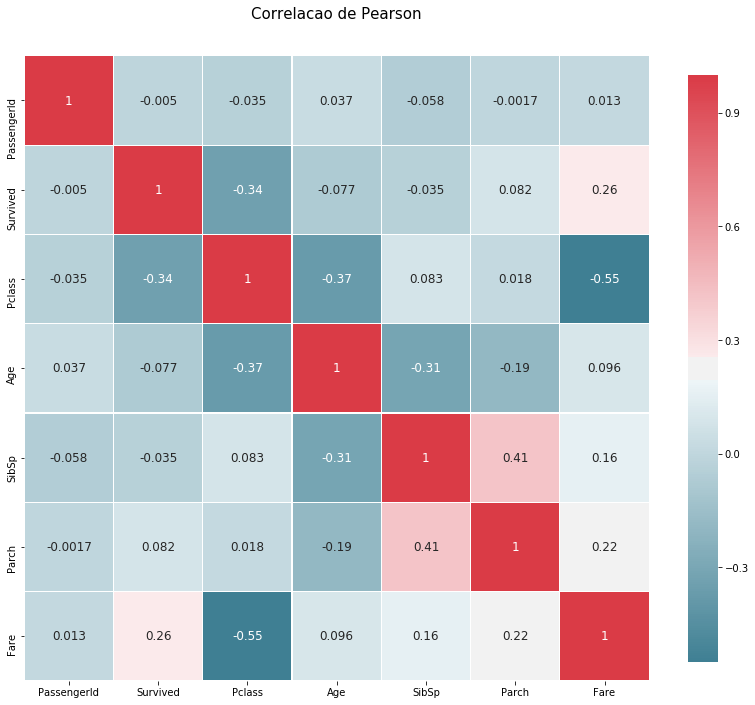

In [6]:
TuringPearsonCorr(df_00)

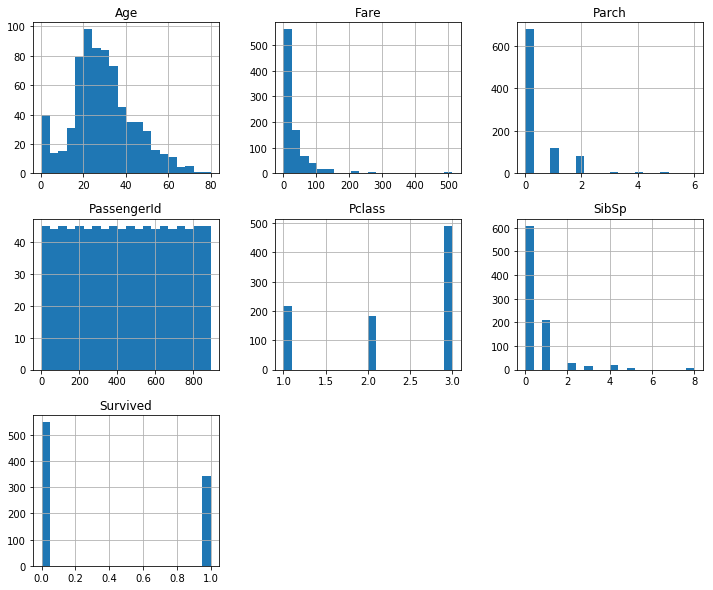

In [7]:
TuringHistogram(df_00)  

#### BoxPlot

In [8]:
lista_boxplot = ['Age','SibSp']

TuringBoxPlotIntVars(df_00,lista_boxplot) 

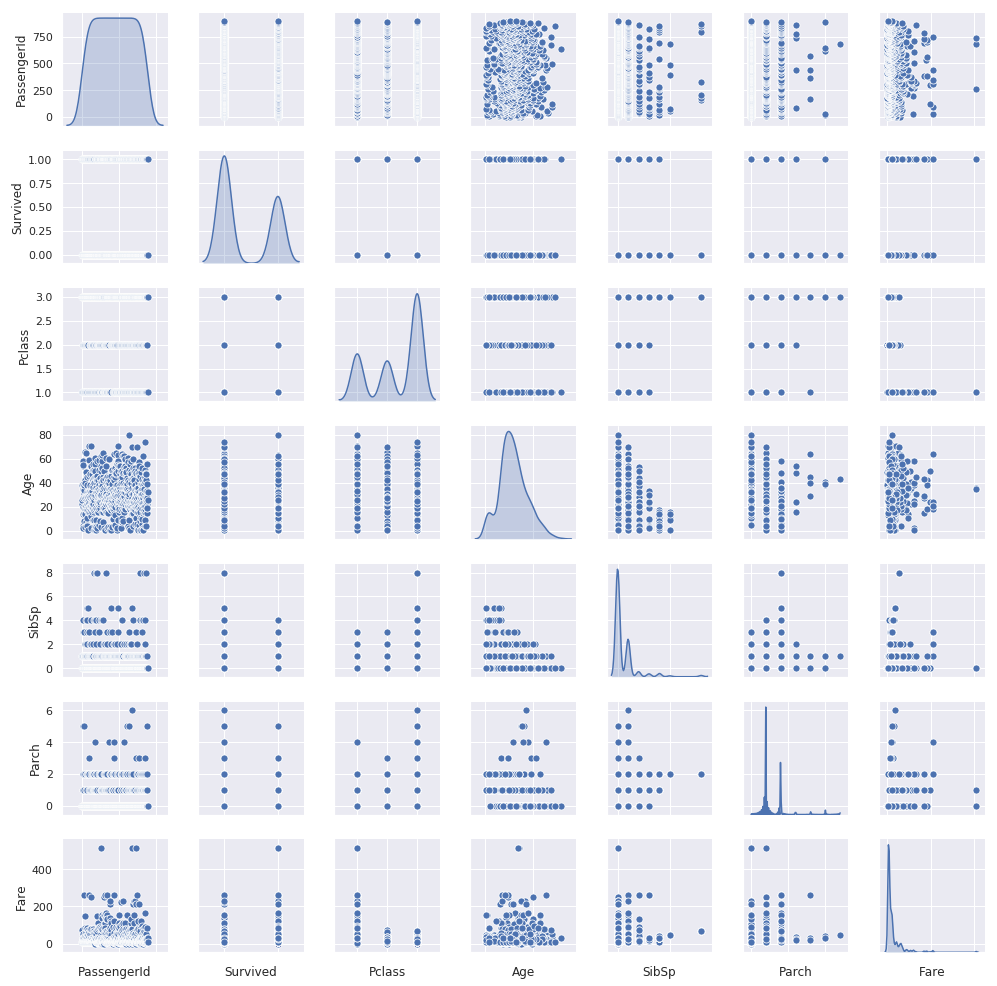

In [9]:
TuringDVPairPlot(df_00,sizegraph=2,plot_s = 50)

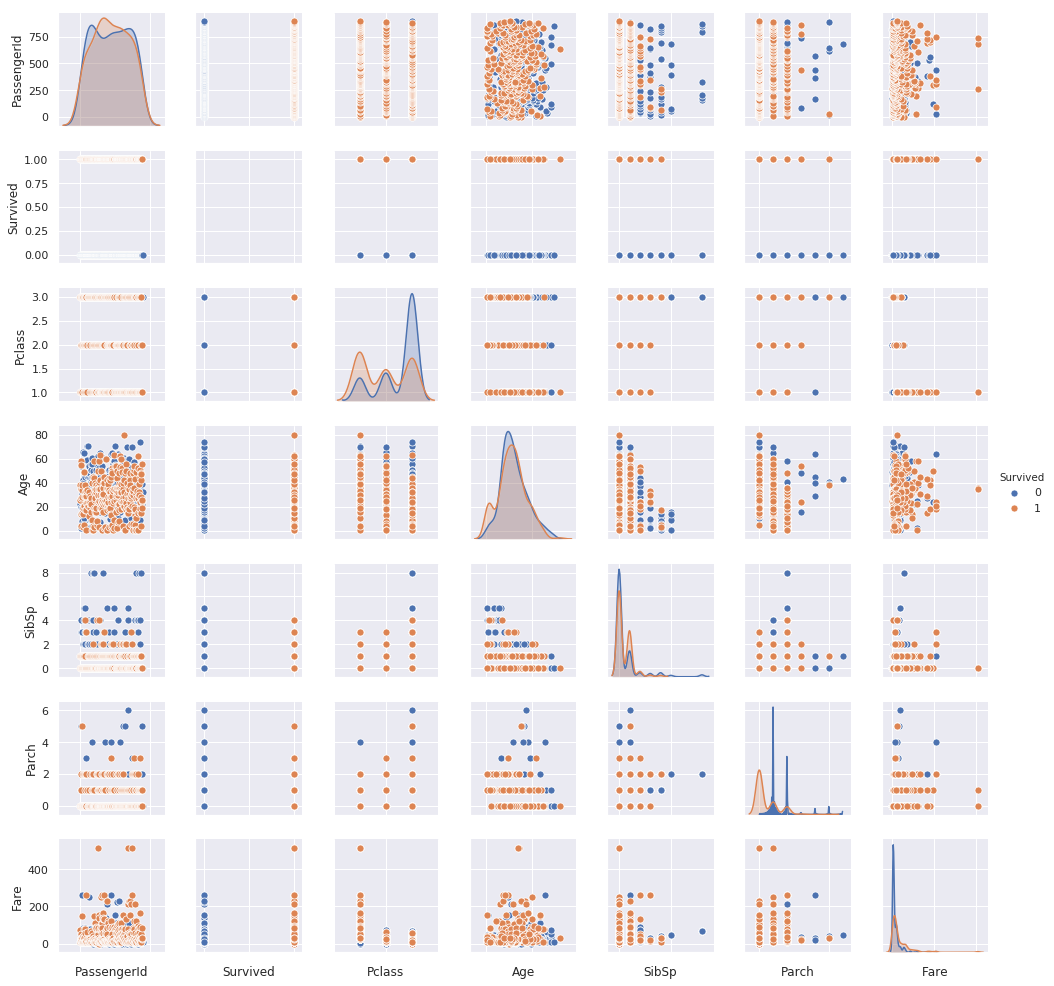

In [10]:
TuringDVPairPlot(df_00,targetname='Survived',sizegraph=2,plot_s = 50)

#### Aplicar a função para preparação de dados
    * Necessário criar um projeto no TuringLab
    * Execute o Timeline do menu Target Binário até a etapa de Ajuste de Metadados

#### Parametrização do projeto criado no TuringLab

In [12]:
#---------- Definição dos Parâmetros do projeto ---------------------------------
nm_bucket = 'turing-bkt-treinamentos'
id_projeto = '350001'
nm_file = 'titanic_kaggle_train.csv'
id_empresa = '1022' 
targetname = 'Survived'
abt_delimiter = ','

#---------- Gerando Credenciais para Acesso Seguro -------------------------------
id_modelo = id_projeto
schema = 'EMP_'+ id_empresa +'_Proj_'+ id_projeto
S3fs,S3session,S3client,S3resource = TuringUsersCredentialsControl(id_empresa)
schema_rds = 'EMP_'+id_empresa+'_Proj_'+id_projeto
mysq_conn,engine = TuringRDSManagementConn(id_empresa,schema_rds,turing_adm = 'N')
path_s3_wfile = 's3://'+nm_bucket+'/Projetos/'+'Projeto_'+id_projeto+'/Modelo_Id_'+id_projeto+'/Modeltrain/'
s3_path = path_s3_wfile

#### Aplicando Preparação de Dados na tabela original

In [37]:
polydeg=1
df_01,meta_stat,list_ids,df_exc_miss,a,b = TuringTrainDataPrep(mysq_conn,df_00,schema_rds,targetname,pctmissreject=80,norm_woe=1)

In [23]:
df_01.head()

,Fare,Age,SibSp,Pclass,Parch,TGD_Sex_female,TGD_Sex_male,TGD_Embarked_C,TGD_Embarked_Q,TGD_Embarked_S,Survived,WoE_Fare,WoE_Age,WoE_SibSp,WoE_Pclass,WoE_Parch
0,-0.502445,-0.592481,0.432793,0.827377,-0.473674,0,1,0,0,1,0,-0.848468,0.032013,0.583103,-0.666483,-0.173748
1,0.786845,0.638789,0.432793,-1.566107,-0.473674,1,0,1,0,0,1,-1.398514,0.032013,0.583103,1.003916,-0.173748
2,-0.488854,-0.284663,-0.474545,0.827377,-0.473674,1,0,0,0,1,1,-0.923818,0.032013,-0.166057,-0.666483,-0.173748
3,0.420730,0.407926,0.432793,-1.566107,-0.473674,1,0,0,0,1,1,1.608268,0.032013,0.583103,1.003916,-0.173748
4,-0.486337,0.407926,-0.474545,0.827377,-0.473674,0,1,0,0,1,0,-0.923818,0.032013,-0.166057,-0.666483,-0.173748


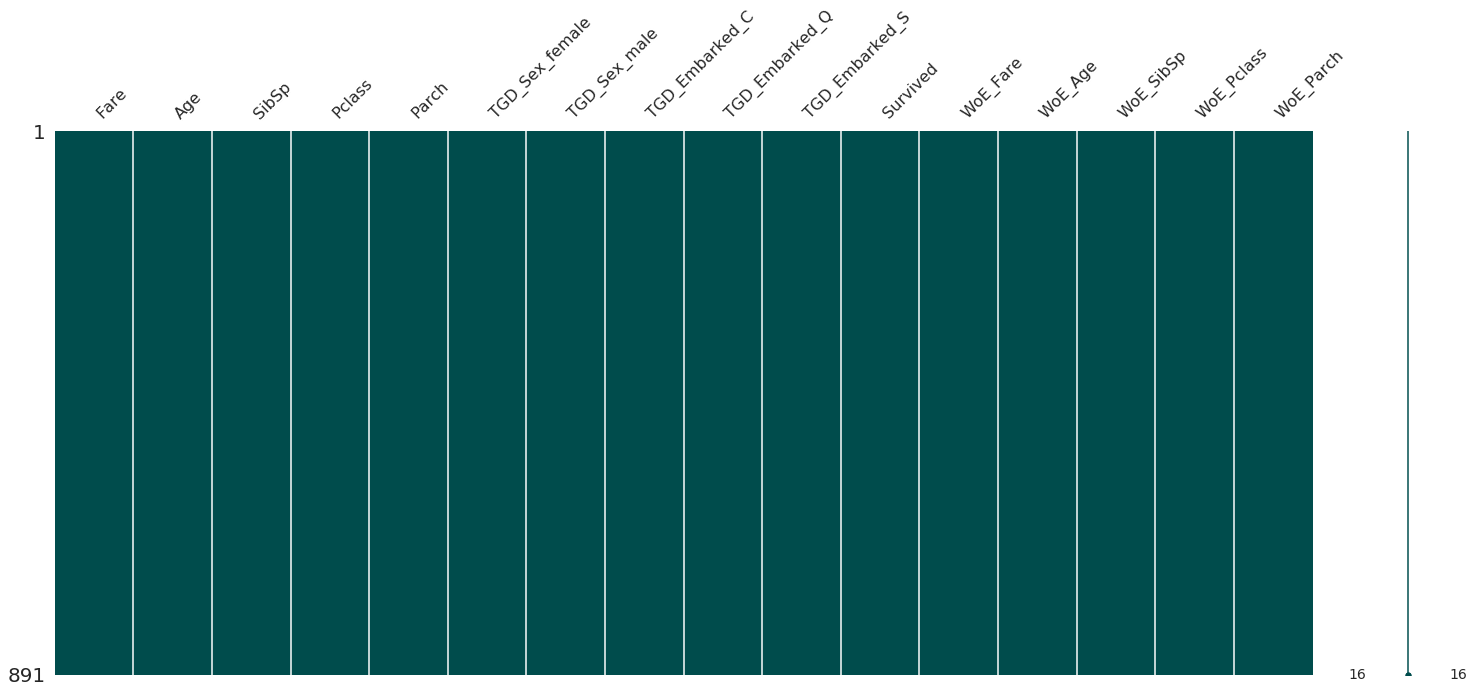

In [24]:
TuringMissingPlot(df_01)

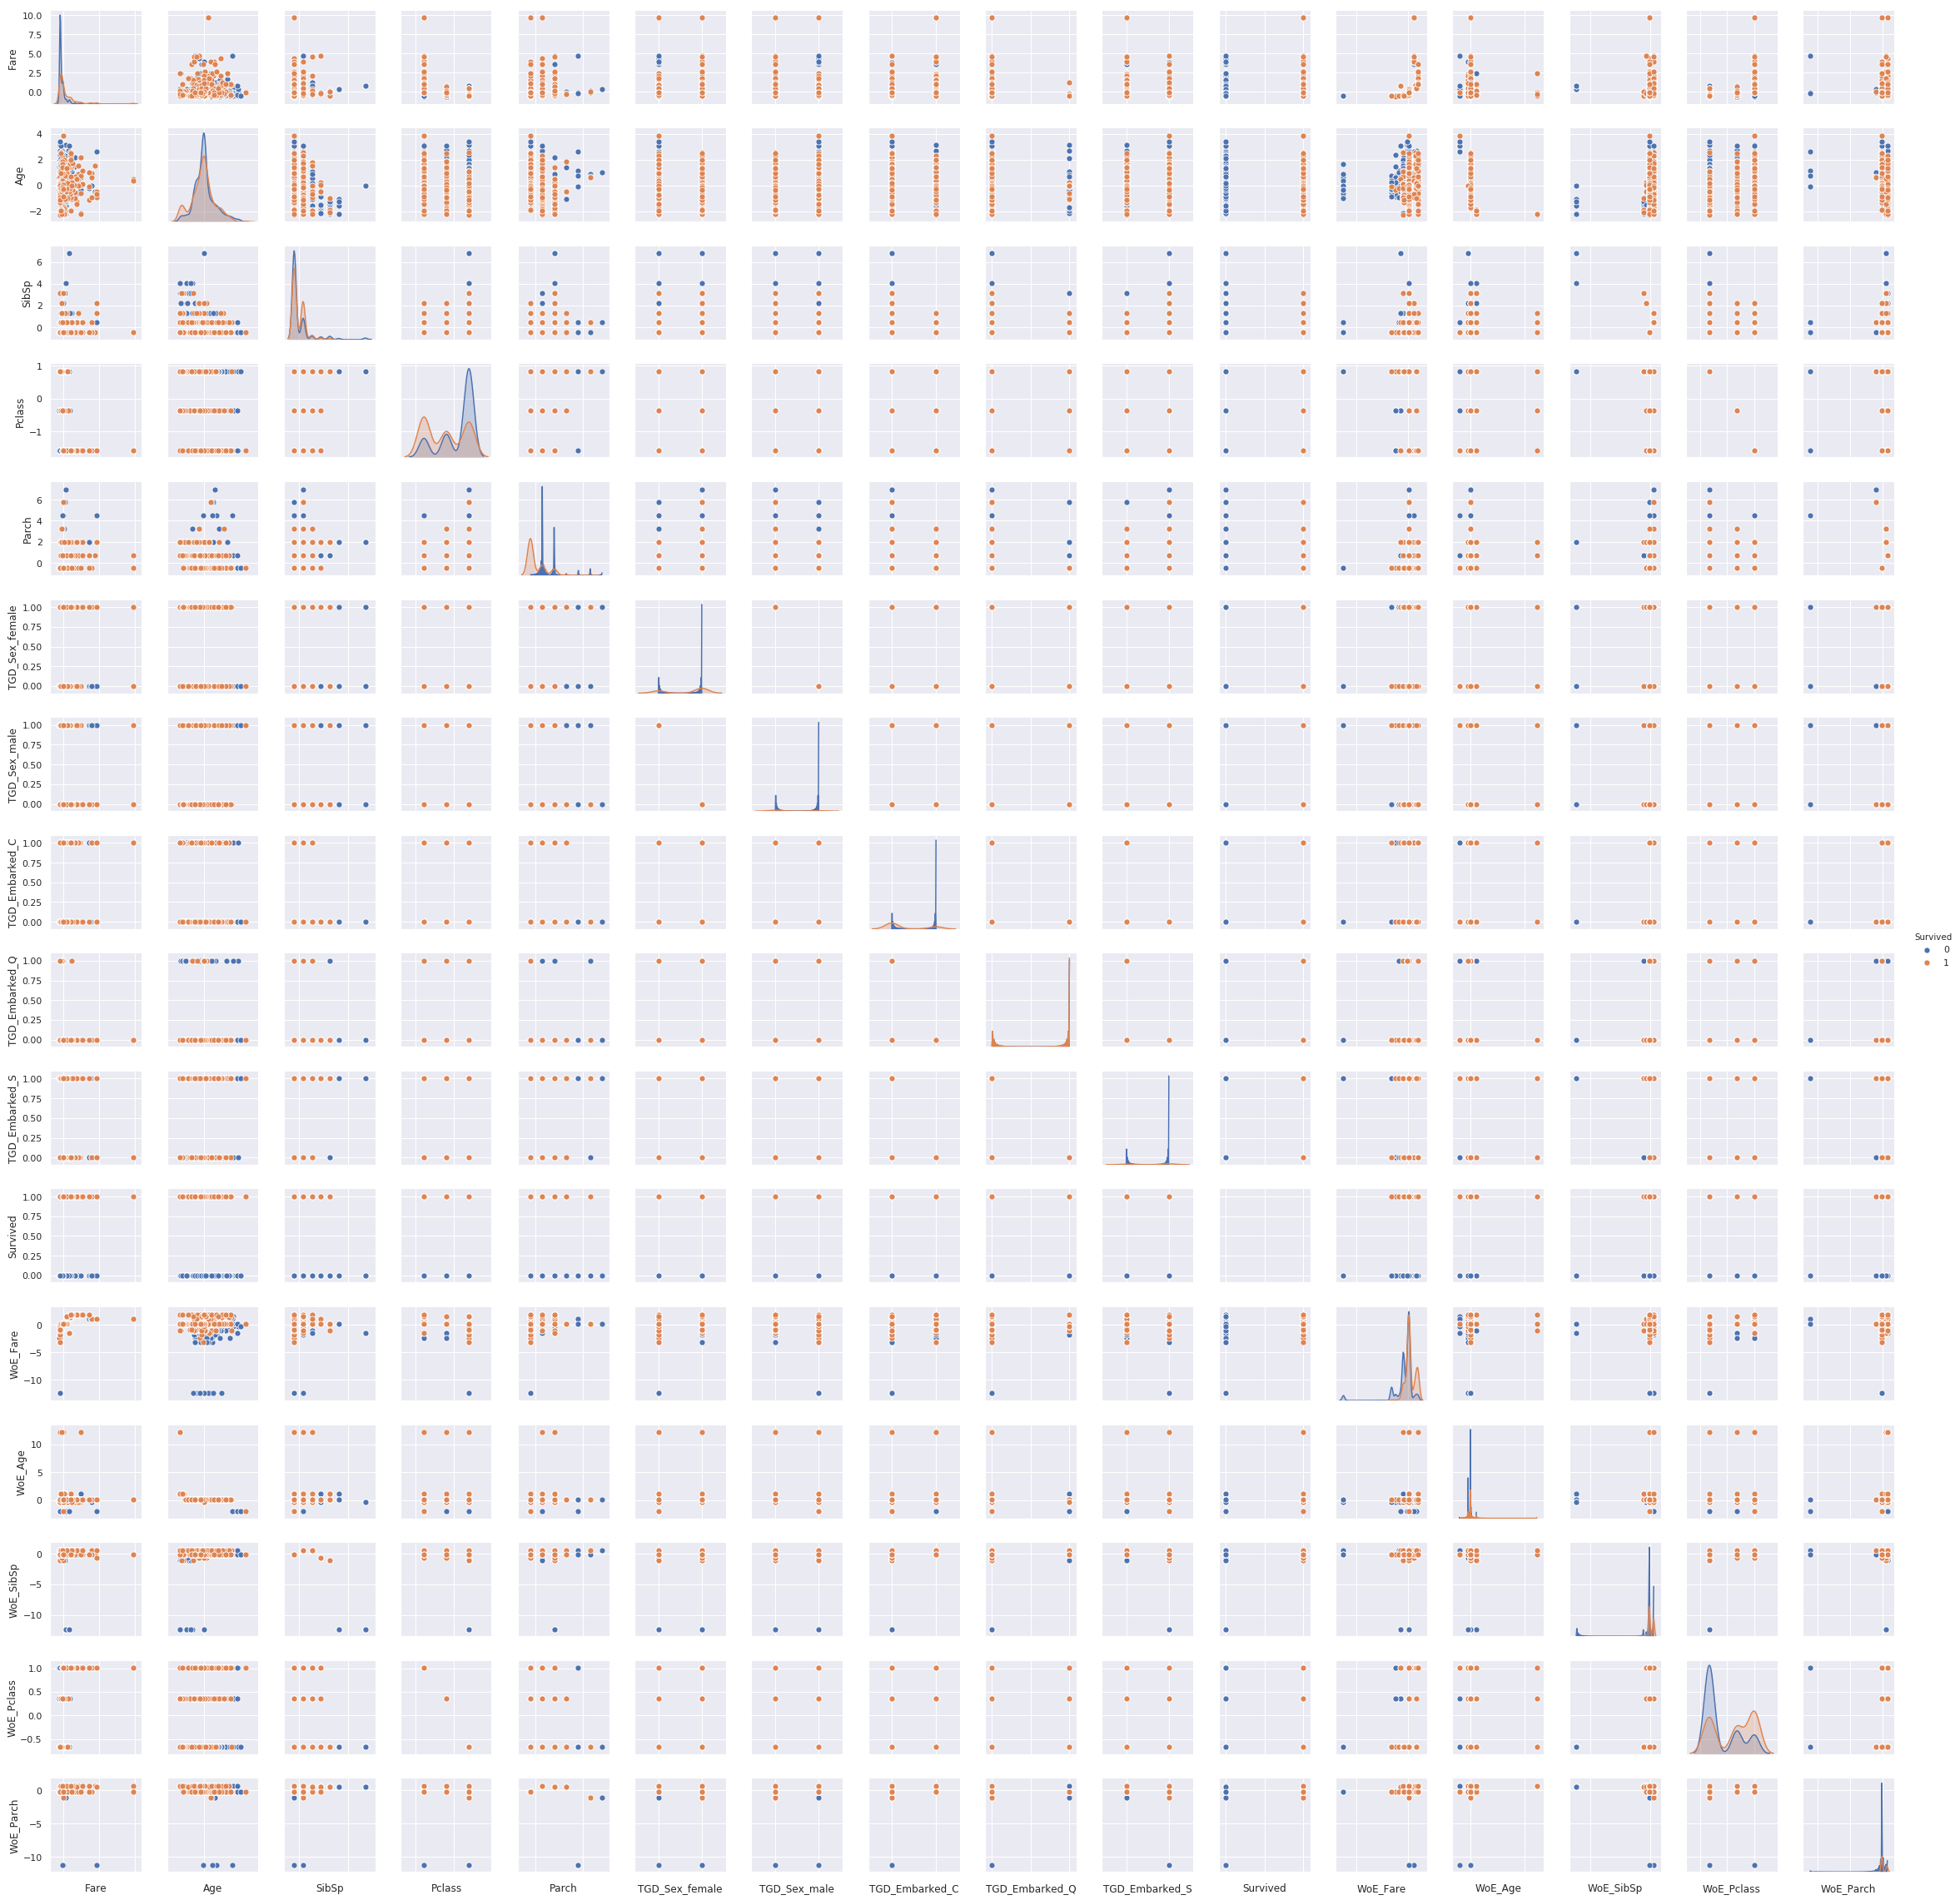

In [26]:
TuringDVPairPlot(df_01,targetname='Survived',sizegraph=2,plot_s = 50)

'TuringNormalProbPlot'

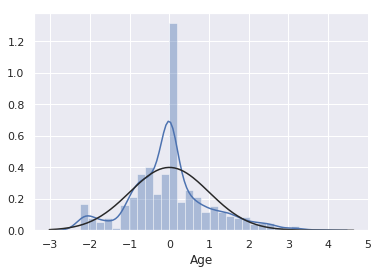

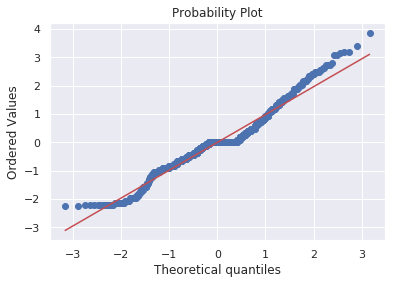

In [28]:
TuringNormalProbPlot(df_01,'Age')

'TuringNormalProbPlot'

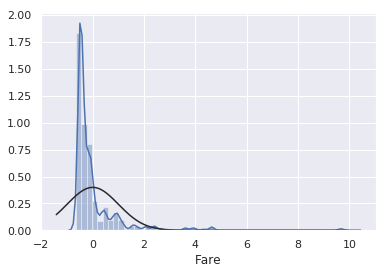

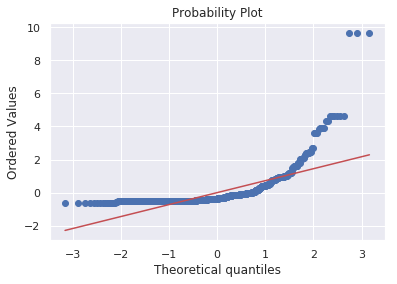

In [29]:
TuringNormalProbPlot(df_01,'Fare')

In [30]:
#Aplicando transformação log na variável 
df_01['Fare'] = np.log(df_01['Fare'])

In [32]:
#TuringNormalProbPlot(df_01,'Fare')

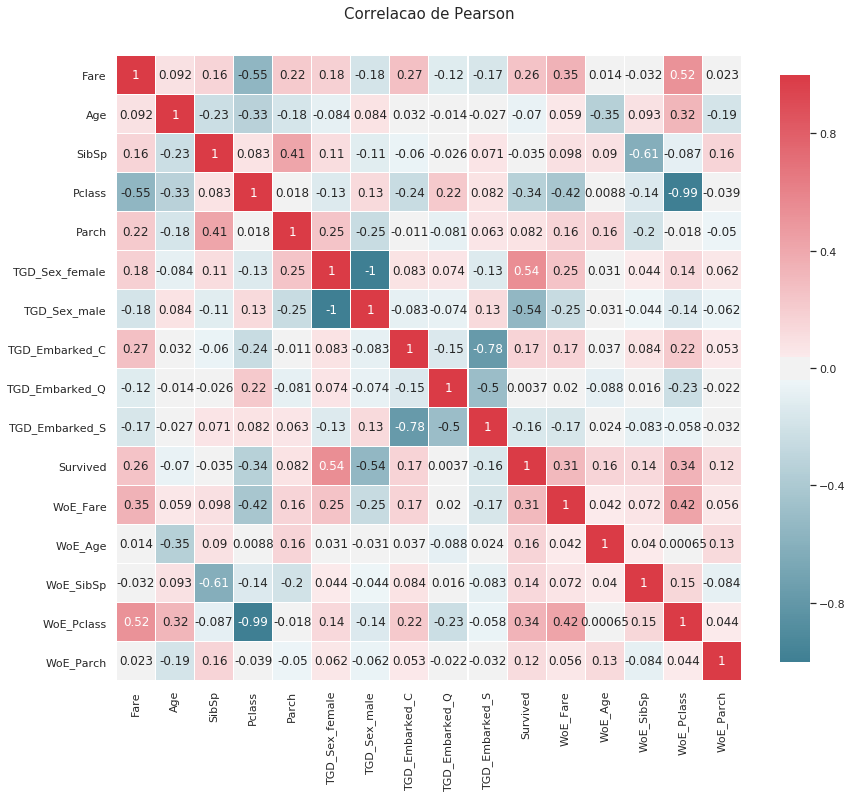

In [38]:
TuringPearsonCorr(df_01)

#### Calculando Correlação de Pearson com o Target

In [44]:
person_order = TuringPearsonCorrTarget(df_01,targetname)
person_order

,index,Survived,Variaveis
10,Survived,1.000000,Survived
5,TGD_Sex_female,0.543351,TGD_Sex_female
14,WoE_Pclass,0.339749,WoE_Pclass
11,WoE_Fare,0.309048,WoE_Fare
0,Fare,0.257307,Fare
7,TGD_Embarked_C,0.168240,TGD_Embarked_C
12,WoE_Age,0.158849,WoE_Age
13,WoE_SibSp,0.135467,WoE_SibSp
15,WoE_Parch,0.117635,WoE_Parch
4,Parch,0.081629,Parch


In [40]:
xsel, imp, vars_modelo_imp_aux  = TuringVariableImportance('gbk',df_01,targetname,'Supervisionado')

In [41]:
imp.sort_values(by='Importancia', ascending=False).head(10)

,Importancia,Variaveis
0,0.342,TGD_Sex_male
1,0.132,TGD_Sex_female
2,0.121,Fare
3,0.118,Age
4,0.116,WoE_Pclass
5,0.056,WoE_Fare
6,0.036,SibSp
7,0.030,Pclass
8,0.019,WoE_SibSp
9,0.011,WoE_Age


### Verifique se a tabela está disponível para Analytics no TuringLab

prod.labturing.com.br/turing